In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("SVM_Data.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

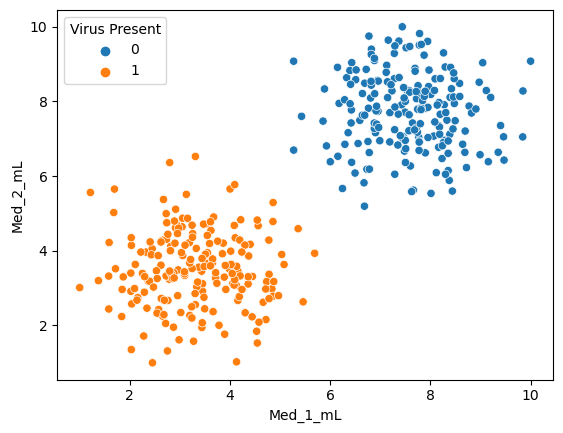

In [7]:
sns.scatterplot(x = 'Med_1_mL',  y = "Med_2_mL", hue = 'Virus Present', data = df)

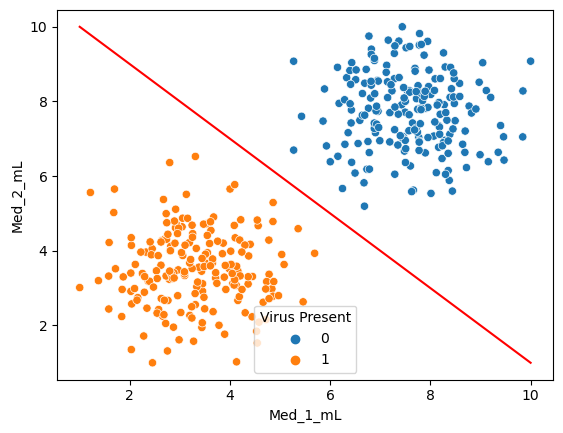

In [9]:
sns.scatterplot(x = 'Med_1_mL',  y = "Med_2_mL", hue = 'Virus Present', data = df)

#hyperplane ---> line
# y = mx + b
m = -1
x = np.linspace(1,10, 100)
b = 11

y = m * x + b
plt.plot(x,y, color = 'red')

In [10]:
#split data
x = df.drop('Virus Present', axis = 1)
y = df['Virus Present']

## **1- Linear SVM**

In [14]:
#call svm model
svm_model = SVC(kernel = 'linear', C = 100)
#fit svm model
svm_model.fit(x,y)

SVC(C=100, kernel='linear')

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


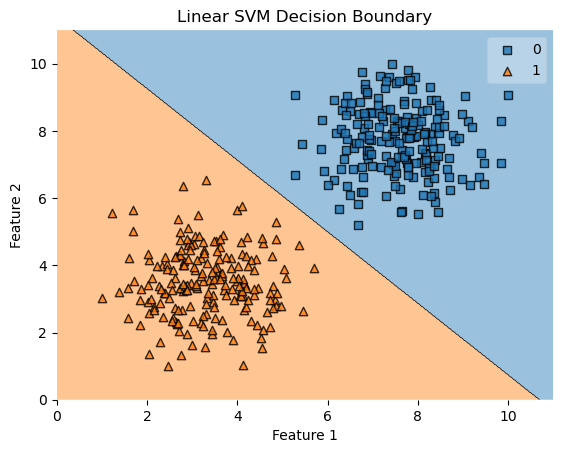

In [19]:
x = np.array(x)
y = np.array(y)

#plot decision boundary
plot_decision_regions(x,y, clf = svm_model)

#add axes annotations
plt.xlabel('Feature 1')
plt.ylabel("Feature 2")
plt.title("Linear SVM Decision Boundary")
plt.show()

## **2- Poly Kernel**

In [24]:
#call svm model
svm_model_poly = SVC(kernel = 'poly', C = 100, degree = 3)
#fit svm model
svm_model_poly.fit(x,y)

SVC(C=100, kernel='poly')

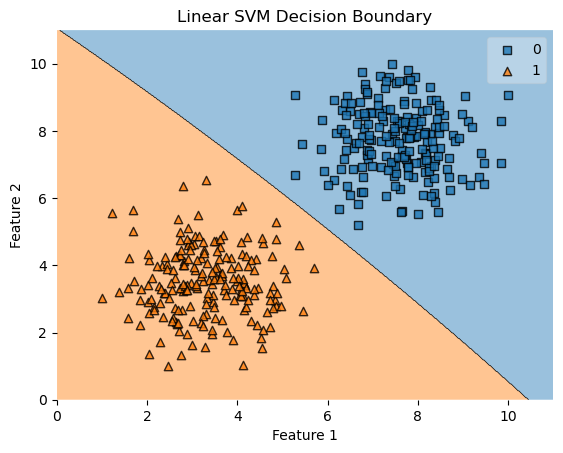

In [25]:
x = np.array(x)
y = np.array(y)

#plot decision boundary
plot_decision_regions(x,y, clf = svm_model_poly)

#add axes annotations
plt.xlabel('Feature 1')
plt.ylabel("Feature 2")
plt.title("Linear SVM Decision Boundary")
plt.show()

## **3- RBF Kernel**

In [28]:
#call svm model
svm_model_rbf = SVC(kernel = 'rbf', C = 100)
#fit svm model
svm_model_rbf.fit(x,y)

SVC(C=100)

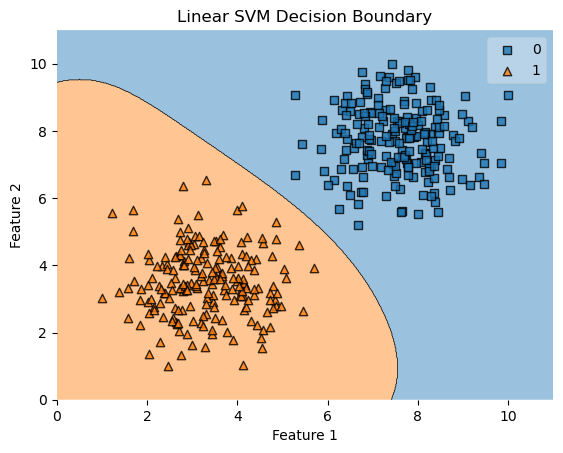

In [29]:
x = np.array(x)
y = np.array(y)

#plot decision boundary
plot_decision_regions(x,y, clf = svm_model_rbf)

#add axes annotations
plt.xlabel('Feature 1')
plt.ylabel("Feature 2")
plt.title("Linear SVM Decision Boundary")
plt.show()

## **4- Sigmoid Kernel**

In [30]:
#call svm model
svm_model_sigmoid = SVC(kernel = 'sigmoid')
#fit svm model
svm_model_sigmoid.fit(x,y)

SVC(kernel='sigmoid')

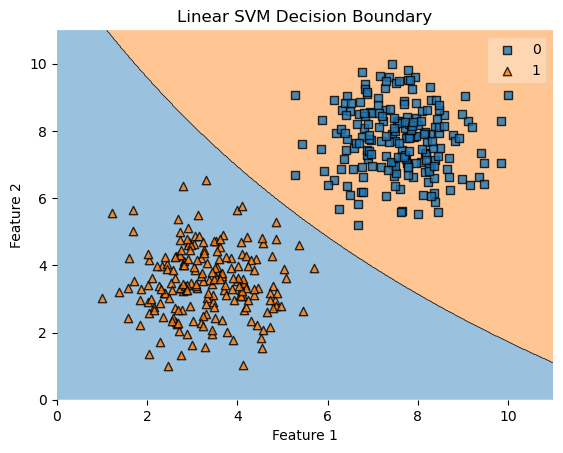

In [31]:
x = np.array(x)
y = np.array(y)

#plot decision boundary
plot_decision_regions(x,y, clf = svm_model_sigmoid)

#add axes annotations
plt.xlabel('Feature 1')
plt.ylabel("Feature 2")
plt.title("Linear SVM Decision Boundary")
plt.show()

## **Hyperparameter Tuning**

In [39]:
model = SVC()
param = {
    'C' : [0.1, 0.01, 0.0001, 1.0],
    'kernel' :['linear', 'rbf', 'sigmoid', 'poly'],
    'gamma' : [0.1, 0.01, 0.0001, 1.0]
}

In [40]:
gs = GridSearchCV(model, param, cv = 5)

In [41]:
gs.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.0001, 1.0],
                         'gamma': [0.1, 0.01, 0.0001, 1.0],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [42]:
print(gs.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [43]:
print(gs.best_score_)

1.0


In [45]:
df.duplicated().sum()

0

## **Example 2**

In [ ]:
1- read dataset
2- chaeck null values and duplication
3- data preprocessing
4- split dataset (y = deposit)
5- apply svm model
6- grid search ---> if model is not good

In [47]:
df = pd.read_csv("bank.csv")

In [48]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [50]:
df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [51]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [52]:
y = df.deposit
x = df.drop(columns = ['deposit'], axis = 1)

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [55]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [57]:
x['job'] = encoder.fit_transform(x['job'])
x['marital'] = encoder.fit_transform(x['marital'])
x['education'] = encoder.fit_transform(x['education'])
x['default'] = encoder.fit_transform(x['default'])
x['housing'] = encoder.fit_transform(x['housing'])
x['loan'] = encoder.fit_transform(x['loan'])
x['contact'] = encoder.fit_transform(x['contact'])
x['month'] = encoder.fit_transform(x['month'])
x['poutcome'] = encoder.fit_transform(x['poutcome'])

In [58]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [61]:
svm_model = svm.SVC()

In [62]:
svm_model.fit(x_train, y_train)

SVC()

In [64]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.50      0.01      0.01      1598

    accuracy                           0.88     13564
   macro avg       0.69      0.50      0.47     13564
weighted avg       0.84      0.88      0.83     13564



In [ ]:
#solution ---> sampling techniques or feature selection 

## **Decision Tree**

In [65]:
df = pd.read_csv("car_data.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [67]:
#drop user id
df.drop(columns = ['User ID'], inplace = True)

In [68]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [69]:
df.duplicated().sum()

57

In [74]:
df = df.drop_duplicates()

In [75]:
df.duplicated().sum()

0

In [76]:
y = df.Purchased

In [77]:
x = df.drop(columns = ['Purchased'], axis = 1)

In [78]:
x.head()

,Gender,Age,AnnualSalary
0,Male,35,20000
1,Male,40,43500
2,Male,49,74000
3,Male,40,107500
4,Male,25,79000


In [79]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [80]:
gender_map = {'Male': 1, 'Female':0}
x.Gender = x.Gender.map(gender_map)
x.head()

,Gender,Age,AnnualSalary
0,1,35,20000
1,1,40,43500
2,1,49,74000
3,1,40,107500
4,1,25,79000


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
#call decision tree model
dt_model = DecisionTreeClassifier()

In [85]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
y_pred = dt_model.predict(x_test)

[Text(0.5430327868852459, 0.9705882352941176, 'x[1] <= 44.5\ngini = 0.486\nsamples = 707\nvalue = [413, 294]'),
 Text(0.2923497267759563, 0.9117647058823529, 'x[2] <= 90750.0\ngini = 0.326\nsamples = 469\nvalue = [373, 96]'),
 Text(0.10792349726775956, 0.8529411764705882, 'x[1] <= 36.5\ngini = 0.087\nsamples = 374\nvalue = [357, 17]'),
 Text(0.09699453551912568, 0.7941176470588235, 'gini = 0.0\nsamples = 225\nvalue = [225, 0]'),
 Text(0.11885245901639344, 0.7941176470588235, 'x[2] <= 68750.0\ngini = 0.202\nsamples = 149\nvalue = [132, 17]'),
 Text(0.10792349726775956, 0.7352941176470589, 'gini = 0.0\nsamples = 74\nvalue = [74, 0]'),
 Text(0.12978142076502733, 0.7352941176470589, 'x[2] <= 84750.0\ngini = 0.351\nsamples = 75\nvalue = [58, 17]'),
 Text(0.11885245901639344, 0.6764705882352942, 'x[2] <= 71750.0\ngini = 0.327\nsamples = 73\nvalue = [58, 15]'),
 Text(0.02185792349726776, 0.6176470588235294, 'x[0] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.01092896174863388, 

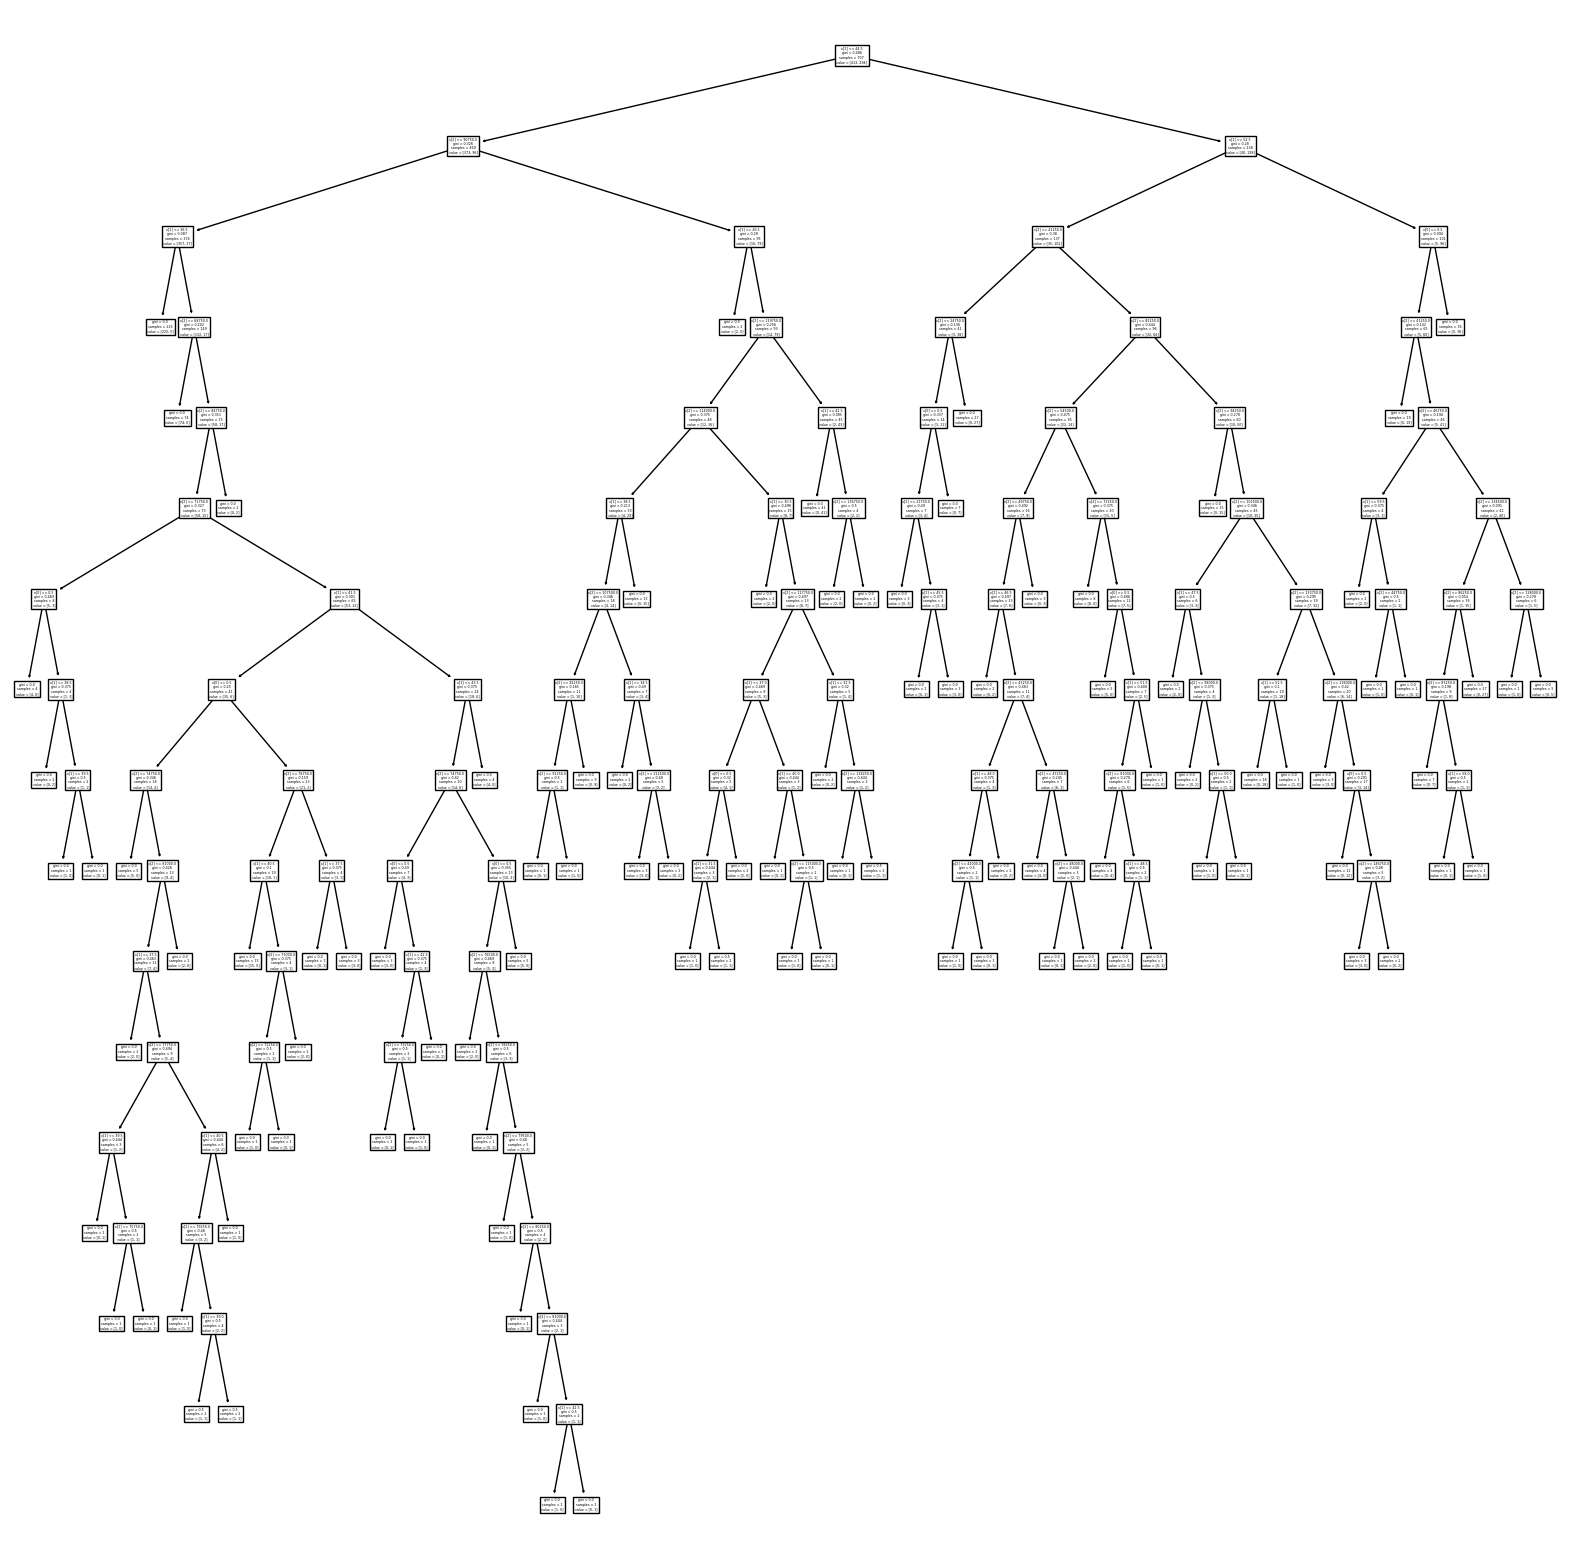

In [87]:
from sklearn import tree
plt.figure(figsize = (20,20))
tree.plot_tree(dt_model.fit(x_train, y_train))

In [88]:
#testing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       138
           1       0.85      0.89      0.87        98

    accuracy                           0.89       236
   macro avg       0.89      0.89      0.89       236
weighted avg       0.89      0.89      0.89       236



In [90]:
#training classification_report
y_pred_train = dt_model.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       413
           1       1.00      0.99      0.99       294

    accuracy                           0.99       707
   macro avg       1.00      0.99      0.99       707
weighted avg       0.99      0.99      0.99       707



In [91]:
param = {
    'criterion' :['gini', 'entropy'],
    'splitter' :['best', 'random'],
    'max_depth' :list(range(5,15)),
    'min_samples_split' : list(range(1,5)),
    'min_samples_leaf' : list(range(1,5))
}

In [92]:
gs = GridSearchCV(dt_model, param)
gs.fit(x_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
800 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "D:\Anaconda\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'splitter': ['best', 'random']})

In [93]:
print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.8952851862950754


In [96]:
#call decision tree model
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 1,
                               min_samples_split = 2, splitter = 'random')

In [97]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='random')

In [98]:
y_pred = dt_model.predict(x_test)

In [99]:
#testing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       138
           1       0.85      0.80      0.82        98

    accuracy                           0.86       236
   macro avg       0.85      0.85      0.85       236
weighted avg       0.86      0.86      0.86       236



In [100]:
#training classification_report
y_pred_train = dt_model.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       413
           1       0.91      0.89      0.90       294

    accuracy                           0.92       707
   macro avg       0.92      0.91      0.91       707
weighted avg       0.92      0.92      0.92       707



[Text(0.27214972527472525, 0.9444444444444444, 'x[1] <= 35.476\nentropy = 0.979\nsamples = 707\nvalue = [413, 294]'),
 Text(0.04945054945054945, 0.8333333333333334, 'x[2] <= 52931.732\nentropy = 0.51\nsamples = 238\nvalue = [211, 27]'),
 Text(0.038461538461538464, 0.7222222222222222, 'entropy = 0.0\nsamples = 81\nvalue = [81, 0]'),
 Text(0.06043956043956044, 0.7222222222222222, 'x[2] <= 136756.335\nentropy = 0.662\nsamples = 157\nvalue = [130, 27]'),
 Text(0.04945054945054945, 0.6111111111111112, 'x[2] <= 86646.364\nentropy = 0.582\nsamples = 151\nvalue = [130, 21]'),
 Text(0.038461538461538464, 0.5, 'entropy = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(0.06043956043956044, 0.5, 'x[2] <= 97836.758\nentropy = 0.959\nsamples = 55\nvalue = [34, 21]'),
 Text(0.03296703296703297, 0.3888888888888889, 'x[2] <= 92342.861\nentropy = 0.491\nsamples = 28\nvalue = [25, 3]'),
 Text(0.02197802197802198, 0.2777777777777778, 'x[2] <= 90174.607\nentropy = 0.235\nsamples = 26\nvalue = [25, 1]'),
 Text(

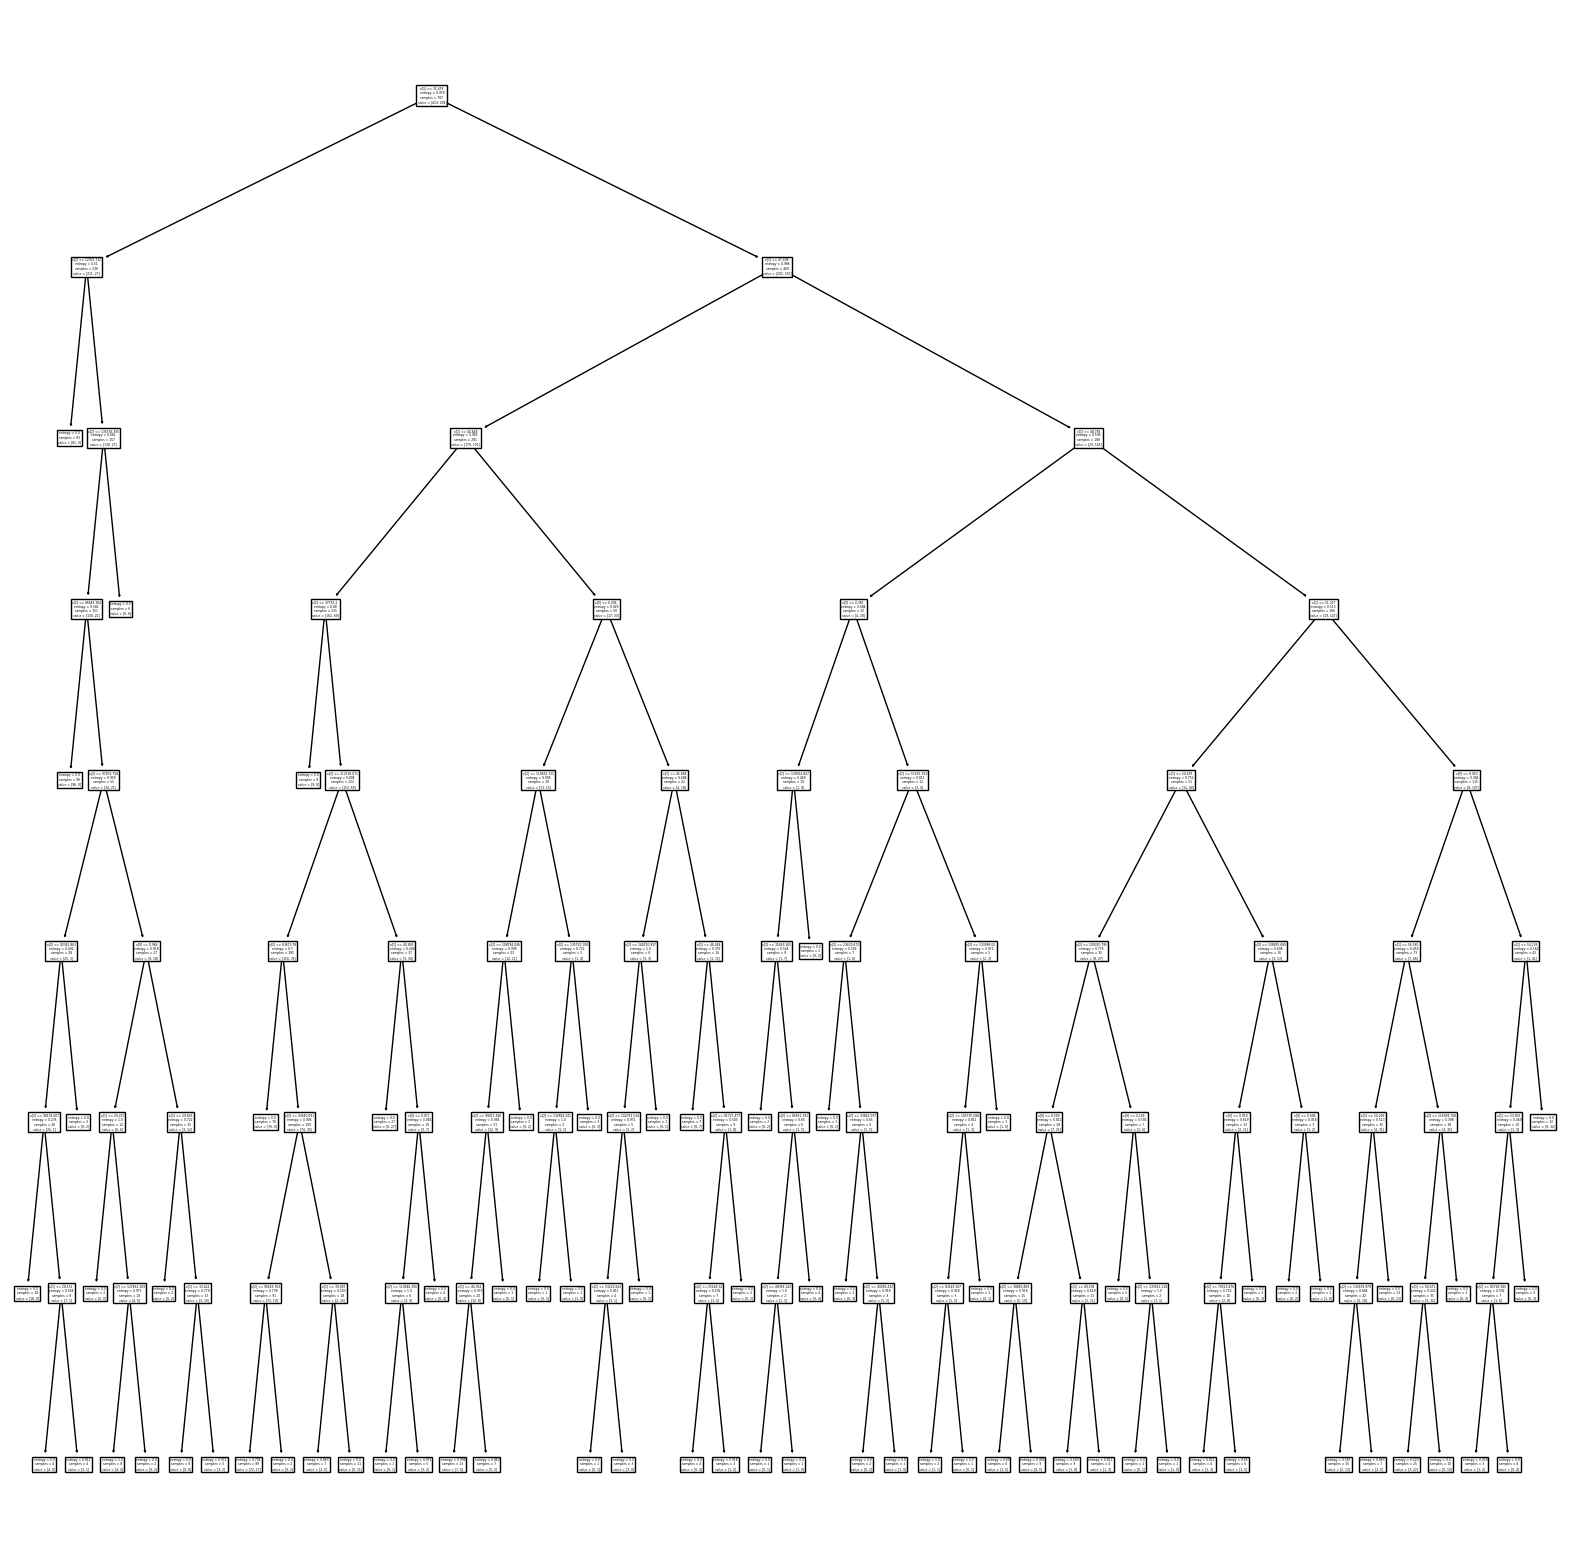

In [101]:
from sklearn import tree
plt.figure(figsize = (20,20))
tree.plot_tree(dt_model.fit(x_train, y_train))

## **Example 2 Decision Tree**

In [102]:
df = pd.read_csv("car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [103]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [105]:
y = df['class']
x = df.drop(columns = ['class'], axis = 1)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [107]:
import category_encoders as ce

In [108]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)

In [110]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [111]:
y_pred = dt_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.27      0.25      0.26       105
        good       0.00      0.00      0.00        16
       unacc       0.66      0.68      0.67       290
       vgood       0.00      0.00      0.00        21

    accuracy                           0.51       432
   macro avg       0.23      0.23      0.23       432
weighted avg       0.51      0.51      0.51       432



In [112]:
y_pred_train = dt_model.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       279
        good       1.00      1.00      1.00        53
       unacc       1.00      1.00      1.00       919
       vgood       1.00      1.00      1.00        44

    accuracy                           1.00      1295
   macro avg       1.00      1.00      1.00      1295
weighted avg       1.00      1.00      1.00      1295



In [113]:
#feature selection
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [116]:
feature_scores = pd.Series(rf_model.feature_importances_,
                           index = x_train.columns).sort_values(ascending = False)

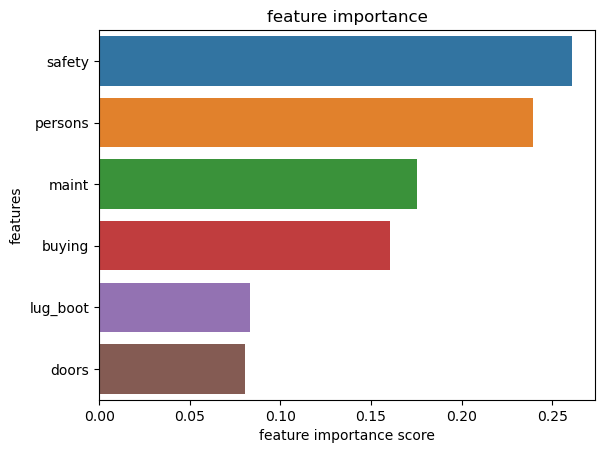

In [117]:
sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel("feature importance score")
plt.ylabel("features")
plt.title("feature importance")
plt.show()

In [118]:
x = df.drop(columns = ['class', 'doors'], axis = 1)
y = df['class']

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [120]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)

In [121]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.30      0.30      0.30       105
        good       0.00      0.00      0.00        16
       unacc       0.69      0.69      0.69       290
       vgood       0.00      0.00      0.00        21

    accuracy                           0.53       432
   macro avg       0.25      0.25      0.25       432
weighted avg       0.53      0.53      0.53       432



In [122]:
y_pred_train = rf_model.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         acc       0.91      0.96      0.94       279
        good       0.89      0.92      0.91        53
       unacc       0.99      0.97      0.98       919
       vgood       0.98      0.91      0.94        44

    accuracy                           0.97      1295
   macro avg       0.94      0.94      0.94      1295
weighted avg       0.97      0.97      0.97      1295

